# Code Written by:
**Shweta Tiwari**
*20 Oct 2023*

## Algorithm:  Page Rank

In [1]:
import time

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Algorithm

In [3]:
%%time
def pagerank(graph, alpha=.9):
    n = len(graph)

    # remove links to self
    graph[range(n), range(n)] = 0

    # ensure stochasticity
    graph[:, graph.sum(0) == 0] = 1
    graph /= graph.sum(0)

    # add random teleports
    graph = alpha * graph + (1 - alpha) / n * np.ones((n, n))

    # power iteration
    prev = np.zeros(n)
    rank = prev + 1 / n
    while (rank - prev) @ (rank - prev) > 1e-8:
        prev = rank
        rank = graph @ rank

    return rank

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


# Run

## Generate Graph

CPU times: user 139 ms, sys: 95.2 ms, total: 234 ms
Wall time: 201 ms


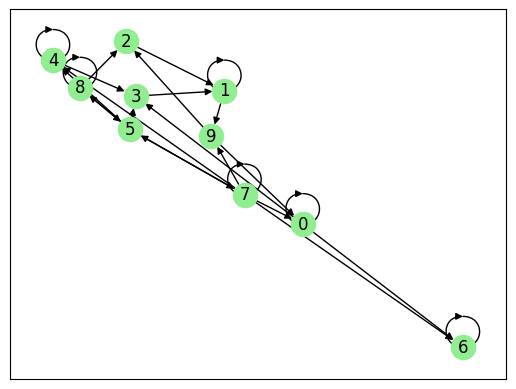

In [4]:
%%time
n = 10

graph = nx.DiGraph()
graph.add_nodes_from(range(n))
graph.add_edges_from(np.random.randint(0, n, (3 * n, 2)))

nx.draw_networkx(graph, node_color='lightgreen')

# The End